In [34]:
import numpy as np
import cmdstanpy
import matplotlib.pyplot as plt
import causalpy as cp

def simulate_regions(n_timesteps: int, n_regions: int) -> np.ndarray:
    rng = np.random.RandomState(0)
    time = np.arange(n_timesteps)
    rfx_int = rng.normal(loc=0, scale=0.25, size=n_regions)
    rfx_slope = rng.normal(loc=0, scale=0.2, size=n_regions)

    expectation = np.exp(
        (0.5 + rfx_slope) * np.sin(2 * np.pi * time.reshape(-1, 1) / 7) + 2.5 + rfx_int
    ) 

    return expectation


def create_counterfactuals(expectation: np.ndarray, lift=1.1) -> np.ndarray:
    n_timesteps, n_regions = expectation.shape
    rng = np.random.RandomState(0)

    noise = rng.multivariate_normal(
        mean=np.zeros(n_regions), cov=3.0*np.eye(n_regions), size=(2, n_timesteps)
    )

    Y0 = expectation + noise[0]
    Y1 = lift * expectation + noise[1]

    return Y0, Y1


def create_geo_data(Y0: np.ndarray, Y1: np.ndarray, treat_time: int = 60, n_treated=1):
    n_timesteps, n_regions = Y0.shape

    treated_times = np.arange(n_timesteps) >= treat_time
    treated_regions = np.arange(n_regions) < n_treated

    yc0 = Y0[np.ix_(~treated_times, ~treated_regions)]
    yc1 = Y0[np.ix_(treated_times, ~treated_regions)]
    yt0 = Y0[np.ix_(~treated_times, treated_regions)]
    yt1 = Y1[np.ix_(treated_times, treated_regions)]
    return (yc0, yc1, yt0, yt1)



expectation = simulate_regions(n_timesteps=120, n_regions=50)

Y0, Y1 = create_counterfactuals(expectation)

# yc0, yc1, yt0, yt1 = create_geo_data(Y0, Y1)

# stan_data = dict(
#     n_timesteps_pre=len(yc0),
#     n_timesteps_post=len(yc1),
#     n_control_regions=yc1.shape[1],
#     n_treatment_regions=yt0.shape[1],
#     y_control_pre=yc0,
#     y_control_post=yc1,
#     y_treatment_pre=yt0,
#     y_treatment_post=yt1,
#     sample=1,
#     sum_to_one_constraint=1
# )



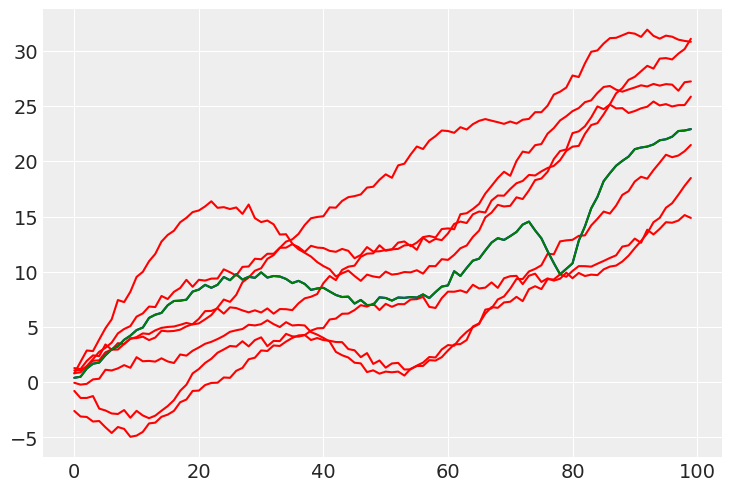

In [35]:
df = cp.load_data("sc")

treatment_time_idx = 70
Y = df.loc[:, list('abcdefg') + ['actual']].values


stan_data = dict(
    n_timesteps = len(Y),
    treatment_time_idx = treatment_time_idx,
    n_regions = Y.shape[1],
    n_treated = 1,
    treated_region_id = [Y.shape[1]],
    control_region_id = np.arange(1, Y.shape[1]).tolist(),
    Y = Y

)

colors = Y.shape[1]*['red']
colors[-1] = 'blue'


for y, c in zip(Y.T, colors):
    plt.plot(y, color=c)

plt.plot(Y[:, Y.shape[1]-1,], color='green')

In [36]:
Y.std(0)


array([6.22050881, 8.47257176, 4.29961015, 5.23450129, 9.8310597 ,
       7.49598946, 7.33223159, 5.44815384])

In [37]:
model = cmdstanpy.CmdStanModel(stan_file="geo_model.stan")
fit = model.sample(data=stan_data, show_console=False)
print(fit.diagnose())

21:58:35 - cmdstanpy - INFO - compiling stan file /Users/demetripananos/Desktop/geo/geo_model.stan to exe file /Users/demetripananos/Desktop/geo/geo_model
21:58:42 - cmdstanpy - INFO - compiled model executable: /Users/demetripananos/Desktop/geo/geo_model
21:58:42 - cmdstanpy - INFO - CmdStan start processing
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/l

chain 1 |          | 00:00 Status

/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datas

chain 2 |          | 00:00 Status

/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datas

chain 3 |          | 00:00 Status

/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datascience/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/demetripananos/miniconda3/envs/datas

chain 4 |          | 00:00 Status

21:58:43 - cmdstanpy - INFO - CmdStan done processing.
21:58:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'geo_model.stan', line 73, column 8 to column 124)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'geo_model.stan', line 73, column 8 to column 124)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'geo_model.stan', line 73, column 8 to column 124)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'geo_model.stan', line 73, column 8 to column 124)
	Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in 'geo_model.stan', line 73, column 8 to column 124)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'geo_model.stan', line 73, column 8 to column 124)
Exception: normal_id_glm_lpdf: Scale vector is in


Processing csv files: /var/folders/tz/6cbs4vm91539frf3vzvqjmcr0000gn/T/tmpu2kmtc7g/geo_model5ny3wgix/geo_model-20241111215842_1.csv, /var/folders/tz/6cbs4vm91539frf3vzvqjmcr0000gn/T/tmpu2kmtc7g/geo_model5ny3wgix/geo_model-20241111215842_2.csv, /var/folders/tz/6cbs4vm91539frf3vzvqjmcr0000gn/T/tmpu2kmtc7g/geo_model5ny3wgix/geo_model-20241111215842_3.csv, /var/folders/tz/6cbs4vm91539frf3vzvqjmcr0000gn/T/tmpu2kmtc7g/geo_model5ny3wgix/geo_model-20241111215842_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [38]:
draws = fit.stan_variables()

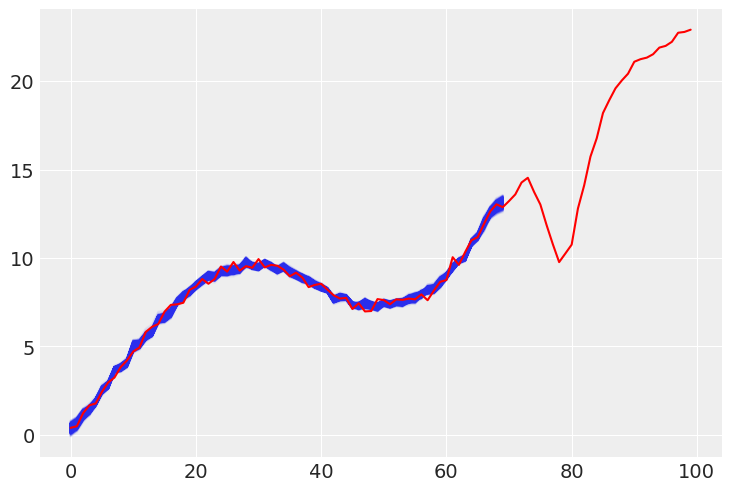

In [39]:
fig, ax = plt.subplots()



ax.plot(draws['insample_fit'][:, :, 0].T, color='C0', alpha=0.05)
ax.plot(Y[:, -1], color='red')

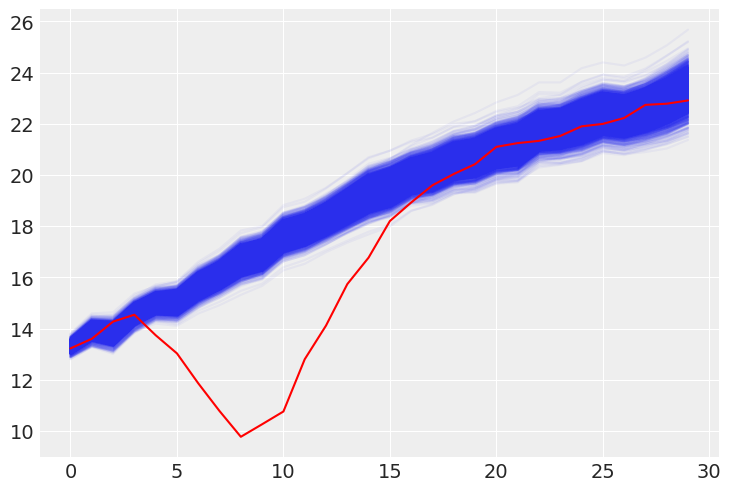

In [40]:
fig, ax = plt.subplots()

ax.plot(draws['expected_counterfactual'][:, :, 0].T, color='C0', alpha=0.05)
ax.plot(Y[treatment_time_idx:, -1], color='red')

(array([   4.,   22.,  153.,  561., 1033., 1134.,  713.,  285.,   77.,
          18.]),
 array([-0.151746  , -0.14036732, -0.12898864, -0.11760996, -0.10623128,
        -0.0948526 , -0.08347392, -0.07209524, -0.06071656, -0.04933788,
        -0.0379592 ]),
 <BarContainer object of 10 artists>)

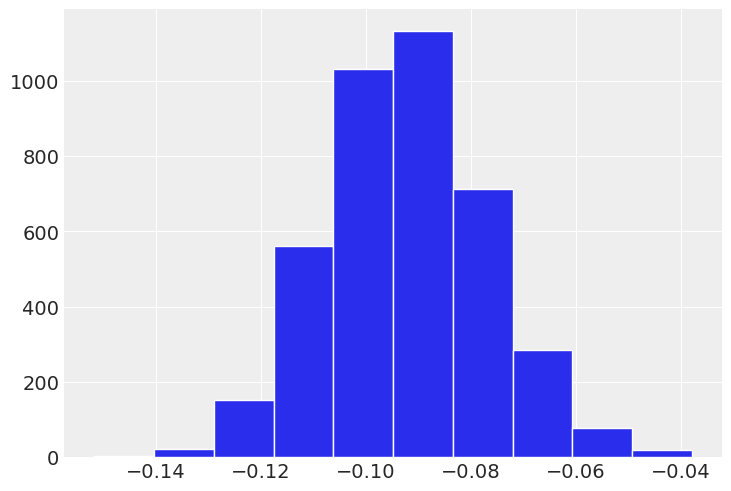

In [41]:
plt.hist(draws['total_lift'], edgecolor='white')

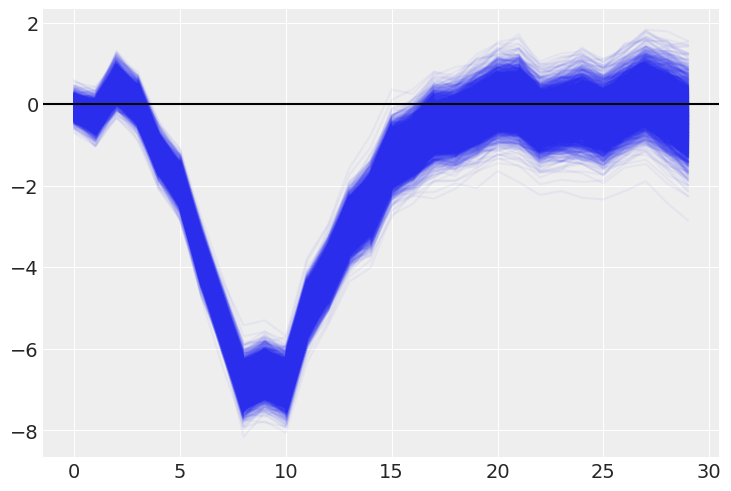

In [43]:
plt.plot(draws['treatment_effect_on_treated'][:, :, 0].T, color='C0', alpha=0.05);
plt.axhline(0, color = 'k')


In [ ]:
plt.plot(draws['cumulative_treatment_effects'][:, :, 0].T, color='C0', alpha=0.05);
plt.axhline(0, color = 'k')
